In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("articles_data.csv", index_col="index")

In [3]:
# Quel pourcentage d'articles likés est également partagés
df.fillna(0)
# df = df.drop(750)
df.published_at = pd.to_datetime(df.published_at)
# nombre d'article total
nbArticle = len(df)
# nombre d'article liké
nbArticleLike = len(df.query('engagement_reaction_count > 0'))
# nombre d'article liké et partagé
nbArticleLikeAndShare = len(df.query('engagement_reaction_count > 0 \
                                      and engagement_share_count > 0'))
# nombre d'article liké et commenté
nbArticleLikeAndComment = len(df.query('engagement_reaction_count > 0 \
                                        and engagement_comment_count > 0'))
# nombre d'article liké, partagé et commenté
nbArticleLikeAndShareAndComment = len(df.query('engagement_reaction_count > 0 \
                                                and engagement_share_count > 0 \
                                                and engagement_comment_count > 0'))
datas = [
           # nbArticleLike / nbArticle * 100,
            nbArticleLikeAndShare / nbArticleLike * 100,
            nbArticleLikeAndComment / nbArticleLike * 100,
            nbArticleLikeAndShareAndComment / nbArticleLikeAndShare * 100
]
labels = [
            #'Like',
            'Like & Share',
            'Like & Comment',
            'Like & Share & Comment'
        ]

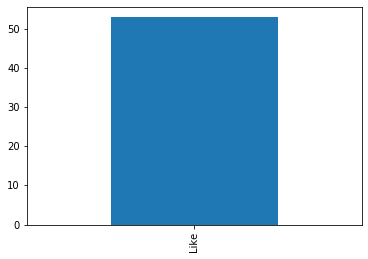

In [4]:
pctLike = pd.Series([nbArticleLike / nbArticle * 100], index = ['Like'])
pctLike.plot.bar()

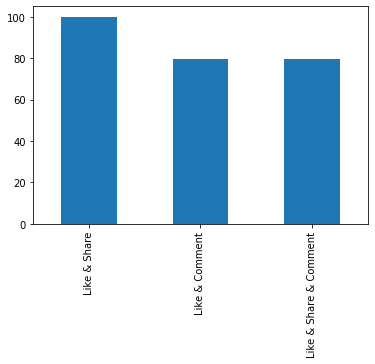

In [5]:
likeDetails = pd.Series(datas, index = labels)
likeDetails.plot.bar()

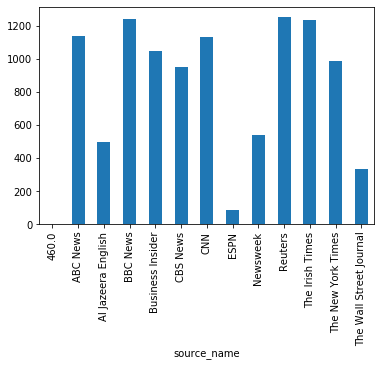

In [6]:
df.groupby('source_name').count()['title'].plot.bar()

nbTotalArticle = 10437
nbTotalArticleSigne = 4693
% article signé = 44.97
Eoin Burke-Kennedy
Deirdre McQuillan
Pat Leahy
Sahar Halaimzai
Ben Rothenberg
Amy Qin
Eoin Burke-Kennedy
Steven Asarch
Daniel Strauss
Florence Fabricant
Dan DeFrancesco
Brendan Pierson
Priya Parmar
Sonam Sheth
Gina Heeb
Catherine Lucey
Casey Sullivan
Frank McNally
Maya Salam
Kelly Wynne
Julie Jargon
Jonathan Stempel
Janice Williams
Ella Torres
Christopher Mims
Chantal Da Silva
Ruma Paul
Steven John
Sunny Chanel
Richard Leiter, M.D.
Chris Buckley
Jason Murdock
Daniel Keyes
Daniel Victor
Caroline Lupini
Shauna Bowers
Marianna Parraga
Mike Ives
Phillip Martinez
Brent Heavener
Becky Peterson
Laure Fourquet
Brendan Cole
Dana Thomas
Keith Schneider
Alberto Dabo
Kevin O'Sullivan, Brady Jones
Ali Kucukgocmen
Trish Turner
Dan Thawley
Tim Arango
Ali Watkins
Alicia Parlapiano
Dan Cancian
Onke Ngcuka
Colin Gleeson
Tufayel Ahmed
Tommy Wilkes
Benjamin Fearnow
Haley Ott
Jonathan Martin
Antonio Villas-Boas
Aimee Picchi
Jordan Va

Ashley Rodriguez
Anna Momigliano
Jessica Firger
Roberta Smith
Priyanka Mattoo
Aristos Georgiou
Tim O'Brien
Eoin Burke-Kennedy
Corey Kilgannon and Aaron Randle
Tucker Reals
Clint Proctor
Kevin Webb
Peter Crawley
Lulu Chang
Glenn Kenny
Conor Lally
Coral Davenport and Lisa Friedman
Scott McDonald
Caity Weaver
Jason Guerrasio
Kate Smith
Patrick Logue
Chester Higgins
Cliff Taylor
Devon Delfino
Daniel Strauss
Christian Plumb
Opinion by Rebecca Wanzo
Dave Itzkoff
Ewan Palmer
Valerie  Volcovici
Joe Williams
Charlie Goldberg
Liz Hampton
Phillip Martinez
Ramsey Touchberry
Kelly McLaughlin, INSIDER
Richard C. Paddock
Sarah Marsh
Martin Doyle
Rahul Bedi
Alexis Petridis
Aristos Georgiou
Caitlin O'Kane
Arwa Ibrahim
Jeffery C. Mays
Andy Sullivan
Ana Swanson and Alan Rappeport
Travis Clark
Ewan Palmer
P.R. Venkat , Joanne Chiu
Jennifer Fickley-Baker
Melissa Guerrero
Scott McDonald
Kathryn Watson
Elizabeth Alterman
John Haltiwanger
Barry Roche
Sumeet Chatterjee
Marcelo Rochabrun
Ruwa Shah
Siddharth Cav

Jennifer Steinhauer
feedback@businessinsider.com (Mariel Soto Reyes), Mariel Soto Reyes
Ahmed Rasheed
feedback@businessinsider.com (Carmen Reinicke), Carmen Reinicke
Marie O'Halloran
awoodward@businessinsider.com (Aylin Woodward), Aylin Woodward
Frank McDonald
Max Golembo
feedback@businessinsider.com (Quinisha Jackson-Wright), Quinisha Jackson-Wright
Kathryn Olmsted
Melanie Curtsinger
Guy Trebay
Dominic Evans
feedback@businessinsider.com (Antonio Villas-Boas), Antonio Villas-Boas
Leah Plunkett
Tariro Mzezewa
Inyoung Kang
Ben Hubbard
tmohamed@businessinsider.com (Theron Mohamed), Theron Mohamed
Katherine Faulders
Sarah Mervosh
Kevin O'Sullivan
Julie Lasky
dsmith@businessinsider.com (Dave Smith), Dave Smith
Corey Kilgannon
Steve Lohr
tclark@businessinsider.com (Travis Clark), Travis Clark
Drake Baer, Sherin Shibu
Marie O'Halloran
Rebecca Davis O’Brien
John McCrank
Thomas Gibbons-Neff and Najim Rahim
Joyce Lee
Laura Snapes
Rachel Premack
bwinck@businessinsider.com (Ben Winck), Ben Winck
T

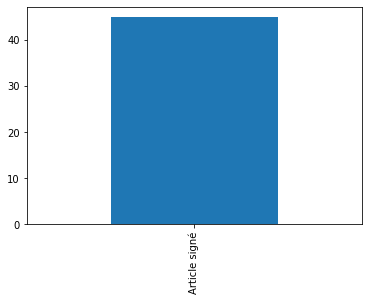

In [10]:
dfWithoutNaNAuthor = df[df['author'].notnull()]

dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.source_name not in x.author, axis=1)]
dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.author not in x.source_name, axis=1)]

keywordBanned = ('The', 'http', 'BBC', 'ABC', 'CBS', 'WSJ Staff')

dfWithoutNaNAuthor = dfWithoutNaNAuthor[~dfWithoutNaNAuthor.author.str.startswith(keywordBanned)]

count = dfWithoutNaNAuthor['author'].str.split().str.len()
dfWithAuthor = dfWithoutNaNAuthor[~(count==1)]

nbTotalArticle = len(df)
nbTotalArticleSigne = len(dfWithAuthor)

print ('nbTotalArticle = ' + str(nbTotalArticle))
print ('nbTotalArticleSigne = ' + str(nbTotalArticleSigne))
print ('% article signé = ' + str(round(nbTotalArticleSigne / nbTotalArticle * 100,2)))

pctArticleSigne = pd.Series([nbTotalArticleSigne / nbTotalArticle * 100], index = ['Article signé'])
pctArticleSigne.plot.bar()

# for x in dfWithAuthor.author:
#     print(x)

In [12]:
df[df['top_article'] == 1.0]

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
index,,,,,,,,,,,,,,
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03 14:40:00+00:00,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
17,cbs-news,CBS News,CBS/AP,Coast Guard suspends search efforts for victim...,Investigators have received more than 100 call...,https://www.cbsnews.com/news/california-boat-f...,https://cbsnews2.cbsistatic.com/hub/i/r/2019/0...,2019-09-03 17:47:00+00:00,The U.S. Coast Guard has suspended the search ...,1.0,0.0,0.0,1.0,0.0
27,abc-news,ABC News,The Associated Press,Woman survives 80-foot cliff fall in South Dak...,Authorities say a Minnesota woman has escaped ...,https://abcnews.go.com/US/wireStory/woman-surv...,NaN,2019-09-03 15:56:26+00:00,Authorities say a Minnesota woman has escaped ...,1.0,0.0,0.0,8.0,0.0
31,cbs-news,CBS News,CBS News,9/3: CBSN AM,Deadly storm nears Florida coast; Protests con...,https://www.cbsnews.com/video/93-cbsn-am/,https://cbsnews3.cbsistatic.com/hub/i/r/2019/0...,2019-09-03 16:15:31+00:00,NaN,1.0,0.0,0.0,0.0,0.0
46,bbc-news,BBC News,BBC News,No-deal opponents argue for Commons control,MPs aiming to block no deal have passed the fi...,http://www.bbc.co.uk/news/uk-politics-49573138,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03 18:09:35+00:00,Image copyrightUK Parliament\r\nTory rebels an...,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10382,cnn,CNN,NaN,Live updates: The Trump impeachment inquiry - ...,House GOP Leader McCarthy is calling on Speake...,https://www.cnn.com/politics/live-news/trump-i...,https://dynaimage.cdn.cnn.com/cnn/digital-imag...,2019-10-03 13:39:28+00:00,President Trump today publicly asked Ukraine a...,1.0,4.0,1.0,19.0,0.0
10405,abc-news,ABC News,Luis Martinez and Morgan Winsor,16 paratroopers hospitalized after training ju...,More than a dozen U.S. Army paratroopers were ...,https://abcnews.go.com/US/dozen-army-paratroop...,https://s.abcnews.com/images/US/camp-shelby-ht...,2019-10-03 12:59:00+00:00,More than a dozen U.S. Army paratroopers were ...,1.0,165.0,33.0,44.0,0.0
10410,bbc-news,BBC News,BBC News,First witness testifies in Trump impeachment p...,Kurt Volker resigned last week after he was na...,http://www.bbc.co.uk/news/world-us-canada-4992...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-10-03 14:53:46+00:00,Image copyrightGetty ImagesImage caption\r\n K...,1.0,0.0,0.0,0.0,0.0


In [8]:
dfWithoutAuthorSign = df[~df.index.isin(dfWithAuthor.index)]

dfWithoutAuthorSign = dfWithoutAuthorSign.fillna(0)
dfWithAuthor = dfWithAuthor.fillna(0)

nbTotalArticle = len(df)
nbTotalArticleSigne = len(dfWithAuthor)
nbTotalArticleNonSigne = len(dfWithoutAuthorSign)

pctArticleSigne = round(nbTotalArticleSigne / nbTotalArticle * 100,2)
pctArticleNonSigne = round(nbTotalArticleNonSigne / nbTotalArticle * 100,2)

dfWithAuthor['nb_engagement'] = dfWithAuthor['engagement_reaction_count'] \
                                + dfWithAuthor['engagement_comment_count'] \
                                + dfWithAuthor['engagement_share_count'] \
                                + dfWithAuthor['engagement_comment_plugin_count']

dfWithoutAuthorSign['nb_engagement'] = dfWithoutAuthorSign['engagement_reaction_count'] \
                                    + dfWithoutAuthorSign['engagement_comment_count'] \
                                    + dfWithoutAuthorSign['engagement_share_count'] \
                                    + dfWithoutAuthorSign['engagement_comment_plugin_count']

nbEngagementSigne = dfWithAuthor.nb_engagement.sum()
nbEngagementNonSigne = dfWithoutAuthorSign.nb_engagement.sum()

print("% article signé : " + str(pctArticleSigne))
print("% article non signé : " + str(pctArticleNonSigne))

print("Nombre d'engagement sur les articles signés : " + str(nbEngagementSigne))
print("Nombre d'engagement sur les articles non signés : " + str(nbEngagementNonSigne))

print (df['engagement_reaction_count'].sum()+df['engagement_comment_count'].sum()+df['engagement_share_count'].sum()+df['engagement_comment_plugin_count'].sum())


% artcile signé : 45.07
% artcile non signé : 54.93
Nombre d'engagement sur les articles signés : 3929199.0
Nombre d'engagement sur les articles non signés : 3311397.0
7240596.0
